# Introduction to Matplotlib

---
## Import matplotlib

In [1]:
import matplotlib.pyplot as plt

---
## Matplotlib Jargon

The _figure_ is the window or exportable area that can contain one or more plot.

The _axes_ is the plot itself.

Our general process: Make a figure, populate it with axis that contain our data, format those axis, and then export our figure for use elsewhere.

---
## Matplotlib Pick and Mix

There are many ways to make a matplotlib plot. 

We will start with a live demo of two common approaches and then discuss other variations.

### Demo 1: Pyplot-style plot

- Best for a quick look at your data or for a figure with just one plot
- Generates the figure and axis at the same time 
- Not recommended for functions or scripts that will be reused as part of a larger project

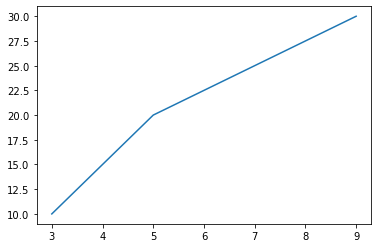

In [2]:
x = [3,5,9]
y = [10,20,30]

plt.plot(x,y)

### Demo 2: Object oriented type

- Best for figure layouts with one or more plots that are the same size
- Figure and axis are specified explicitly
- Suitable for functions or scripts that will be reused in a larger project

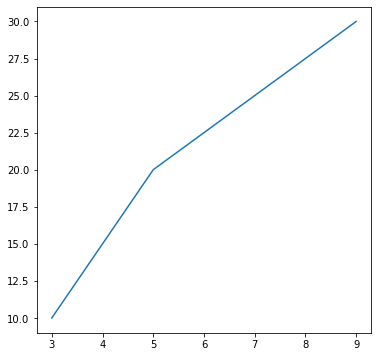

In [3]:
# one plot (axis) in one figure

x = [3,5,9]
y = [10,20,30]

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.plot(x,y)

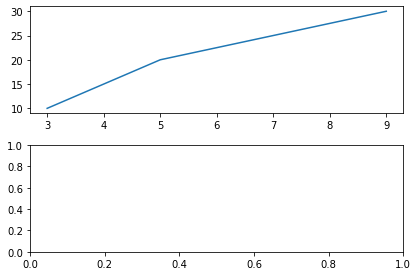

In [4]:
# two plots (axis) in one figure

x = [3,5,9]
y = [10,20,30]

# row, column

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6,4))
fig.tight_layout()

ax0.plot(x,y)


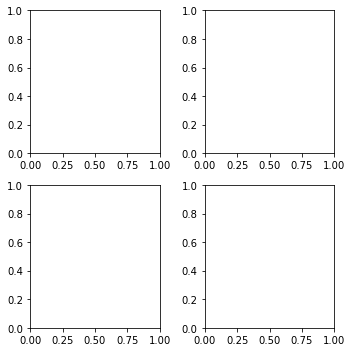

In [5]:
# Four plots (axis) in one figure

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(5,5))

# Fix the layout
fig.tight_layout()

## Two Other Object Oriented Approches 

### (1) Define axis locations as you plot into them

- Similar syntax to the example above, but we use a general term (axs) in the first line and then specify the row, column location of a plot as we use it
- Positive = you don't have to keep track of which axis is in which location
- Negative = more code on each line
- Best for complex figure layouts with multiple plots of the same size
- Figure and axis are specified explicitly
- Suitable for functions or scripts that will be reused in a larger project

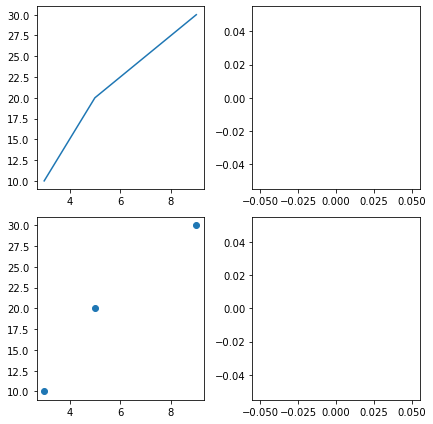

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# [row, column]
axs[0,0].plot(x,y)
axs[1,0].scatter(x,y)
axs[0,1].plot()
axs[1,1].plot()

fig.tight_layout()

### (2) GridSpec for different sized plots (axis)

- Enables you to define plot (axis) with various sizes by defining the width or height of columns and rows
- Best for complex figure layouts with multiple plots of various sizes
- Figure and axis are specified explicitly
- Suitable for functions or scripts that will be reused in a larger project

For more on GridSpec: https://matplotlib.org/stable/gallery/userdemo/demo_gridspec03.html

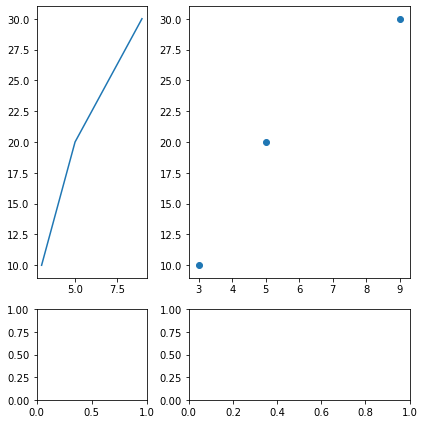

In [7]:
from matplotlib.gridspec import GridSpec

x = [3,5,9]
y = [10,20,30]

# make the figure
fig = plt.figure(figsize=(6,6))

# define the gridspec
spec = GridSpec(
    ncols=2, 
    nrows=2, 
    width_ratios=[1,2], 
    height_ratios=[3,1]
)

# relate the gridspec to axis
ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
ax2 = fig.add_subplot(spec[2])
ax3 = fig.add_subplot(spec[3])

# make your plots
ax0.plot(x,y)
ax1.scatter(x,y)

# fix the layout
fig.tight_layout()


---
# Plot types

In this tutorial, we focus on plotting data in x/y space. Check out [this plot library](https://matplotlib.org/stable/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py) for examples of other plot types. 



---
# Matplotlib and Pandas

Matplotlib works well with Pandas


In [8]:
import pandas as pd

In [9]:
# import data from a csv file
p3 = pd.read_csv('Data/P3.csv')
p3.head(2)

,Location Type,MaxDepth_mTVD,Petrographic term,Homogeneous / Inhomogenous,Consolidated / Unconsolidated,Value effective porosity (%),Min effective porosity (%),Max effective porosity (%),Measuring Type effective porosity,Remarks effective porosity
0,borehole,6.0,Monzodiorite (QAPF),Homogeneous,consolidated,1.35,NaN,NaN,Archimedean weighing,96 h saturation under vacuum
1,borehole,6.0,Monzodiorite (QAPF),Homogeneous,consolidated,1.37,NaN,NaN,Archimedean weighing,96 h saturation under vacuum


In [10]:
# import data from an Excel file
tvz = pd.read_excel('Data/TVZ.xlsx', sheet_name='Data')
tvz.head(2)

,Reservior,Hole_ID,Sample_ID,SampleDepth_mMD,FormationName,RockType,RockCode,AlterationAssemblage,AlterationCode,EffectivePorosity_VolPercent,DryDensity_kgpm3,Vp_mps,Vs_mps,YoungsModulus,PoissonsRatio,UCS_Mpa,DataSource
0,Ngatamariki,NM7,NM 7-1,2180.0,Ngatamariki Andesite Breccia,andesite breccia,A-bx,propylitic,P,1.50,2701.7,4202,2497,41.56,0.24,130.2,Wyering et al. 2014
1,Ngatamariki,NM7,NM 7-2,2180.0,Ngatamariki Andesite Breccia,andesite breccia,A-bx,propylitic,P,1.69,2660.9,4101,2415,34.41,0.24,188.1,Wyering et al. 2014


In [11]:
print('P3 database', p3.columns)
print('TVZ database', tvz.columns)

P3 database Index(['Location Type', 'MaxDepth_mTVD', 'Petrographic term',
       'Homogeneous / Inhomogenous', 'Consolidated / Unconsolidated',
       'Value effective porosity (%)', 'Min effective porosity (%)',
       'Max effective porosity (%)', 'Measuring Type effective porosity',
       'Remarks effective porosity'],
      dtype='object')
TVZ database Index(['Reservior', 'Hole_ID', 'Sample_ID', 'SampleDepth_mMD', 'FormationName',
       'RockType', 'RockCode', 'AlterationAssemblage', 'AlterationCode',
       'EffectivePorosity_VolPercent', 'DryDensity_kgpm3', 'Vp_mps', 'Vs_mps',
       'YoungsModulus', 'PoissonsRatio', 'UCS_Mpa', 'DataSource'],
      dtype='object')


## Plot columns from a dataframe

Data can be called into a matplotlib plot directly from a Pandas dataframe using the syntax below


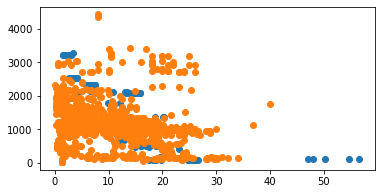

In [12]:
fig, ax = plt.subplots(1,1,figsize=(6,3))

# Use this syntax if there are no spaces in the column headder
ax.scatter(tvz.EffectivePorosity_VolPercent, tvz.SampleDepth_mMD)

# Use this syntax is there is a space in the column headder
ax.scatter(p3['Value effective porosity (%)'], p3.MaxDepth_mTVD);


Strictly speaking, we should convert the columns of the Pandas Dataframe into an np.array by using .values (demo below) or .to_numpy. However, I'm yet to encounter an issue calling a column of data from a Pandas Dataframe without doing this.

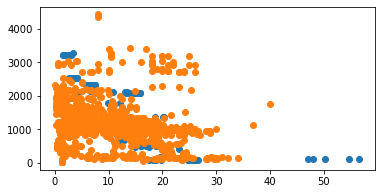

In [13]:
# Same as above but with columns converted to np.array

fig, ax = plt.subplots(1,1,figsize=(6,3))

ax.scatter(tvz.EffectivePorosity_VolPercent.values, tvz.SampleDepth_mMD.values)
ax.scatter(p3['Value effective porosity (%)'].values, p3.MaxDepth_mTVD.values);

---
# Save your figure

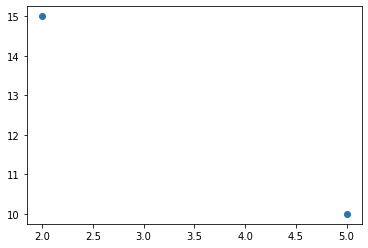

In [14]:
fig, ax = plt.subplots(1,1)

ax.scatter([5,2],[10,15])

plt.savefig('Test.png')

# Can save a figure as...
# Raster formats: png (defult format) or jpg 
# Vector formats: pdf or svg 

# other kwargs to try...
# dpi=300 (300 is good for general use, 500-600 is high resolution)
# facecolor='w' (sets the colour of the area outside the plot)
# transparent=False (sets the plot area to transparent)

# If figure is cut-off by export, use the following kwarg to fit the export to the plot
# bbox_inches='Tight' 
# If using the above kwarg, you can add padding around the tight frame using the following kwarg
# pad_inches=0.1

# For more information on saving figures:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html


---
# Handy hints

If you are making and then saving dozens of figures inside a for loop, then it is useful to close each figure after saving that figure so you don't run out of memory. Use "plt.close()" to do this. 

You need to use "plt.show()" if you want to see your figure when working outside of a jupyter notebook. However, if "plt.show()" is used before saving the figure, then the figure saved will be empty. Place "plt.show()" after "plt.savefig('YourFigure.png')"

---
Tutorial created by [Irene Wallis](https://www.cubicearth.nz/)
